# Introduction
Based on a sample of roughly 450 observations, can we predict how often someone is depressed based on a number of parameters?

# Standard Imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [83]:
csv = 'https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Science/Social%20Mental%20Health%20Decision%20Tree/smmh.csv'
df = pd.read_csv(csv)
df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


# Data Wrangling
Features trees don't require feature scaling so we won't be using sklearn's standard scaler. Instead, we will focus on cleaning data and feature engineering.

In [84]:
df.dropna(axis=0)

df = df.drop('5. What type of organizations are you affiliated with?', axis=1) # Add back later but it is cursed now

# Feature Engineering

# Define Training Parameters

In [91]:
X = df[['18. How often do you feel depressed or down?']]
y = df.drop(X, axis=1); y = y.iloc[:, 8:18]
y =

,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?"
0,5,3,2,5,2,5,2,3,2,4
1,4,3,2,4,5,4,5,1,1,4
2,3,2,1,2,5,4,3,3,1,2
3,4,2,1,3,5,3,5,1,2,3
4,3,5,4,4,5,5,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...
476,3,4,3,4,3,4,4,2,4,4
477,2,1,2,3,4,4,4,2,4,4
478,3,3,4,3,2,3,3,3,4,2
479,2,3,2,3,3,2,2,3,4,5


# Train and Test Split

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=24
)


# Training Data
This is definitely overfitting the data right now. I will add a Grid Search to adjust hyperparameters to find the optimal model.

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=24)
tree_clf = DecisionTreeClassifier(random_state=24)
tree_reg = tree_reg.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

# Hyperparameter Preprocessing
In order to support multi-label classification we need to score with a metric that support it and create a Multi Label Binarizer for each feature.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

labels_list = []
mlb = MultiLabelBinarizer()
y_train.fit_transform(labels_list)

# Hyperparameter 
Now are hyperparameters are ready to be selected in order to find the appropriate model.

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search_cv_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(grid_search_cv_classifier, param_grid, cv=5, scoring='f1_micro')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

c:\Users\Tahlon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tahlon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tahlon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "c:\Users\Tahlon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\Tahlon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "c:\

# Visualize Tree

[Text(0.5, 0.875, 'x[0] <= 2.5\ngini = 0.769\nsamples = 384\nvalue = [[16, 53, 107, 130, 78]\n[46, 78, 83, 90, 87]\n[100, 100, 95, 55, 34]\n[28, 65, 131, 86, 74]\n[31, 62, 81, 102, 108]\n[58, 71, 84, 90, 81]\n[90, 88, 82, 61, 63]\n[53, 89, 172, 48, 22]\n[122, 82, 97, 64, 19]\n[41, 87, 99, 95, 62]]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\ngini = 0.728\nsamples = 116\nvalue = [[10, 23, 38, 30, 15]\n[30, 32, 24, 20, 10]\n[54, 29, 21, 9, 3]\n[21, 31, 40, 14, 10]\n[24, 37, 36, 16, 3]\n[44, 32, 19, 12, 9]\n[51, 27, 22, 10, 6]\n[20, 18, 55, 15, 8]\n[53, 25, 24, 9, 5]\n[29, 42, 28, 14, 3]]'),
 Text(0.125, 0.375, 'gini = 0.656\nsamples = 50\nvalue = [[8, 11, 16, 9, 6]\n[21, 11, 10, 4, 4]\n[32, 9, 5, 3, 1]\n[18, 14, 12, 3, 3]\n[21, 18, 8, 3, 0]\n[29, 9, 7, 1, 4]\n[31, 7, 8, 1, 3]\n[12, 5, 23, 5, 5]\n[32, 8, 5, 2, 3]\n[20, 14, 11, 3, 2]]'),
 Text(0.375, 0.375, 'gini = 0.728\nsamples = 66\nvalue = [[2, 12, 22, 21, 9]\n[9, 21, 14, 16, 6]\n[22, 20, 16, 6, 2]\n[3, 17, 28, 11, 7]\n[3, 19, 28, 13, 3]\n[15, 

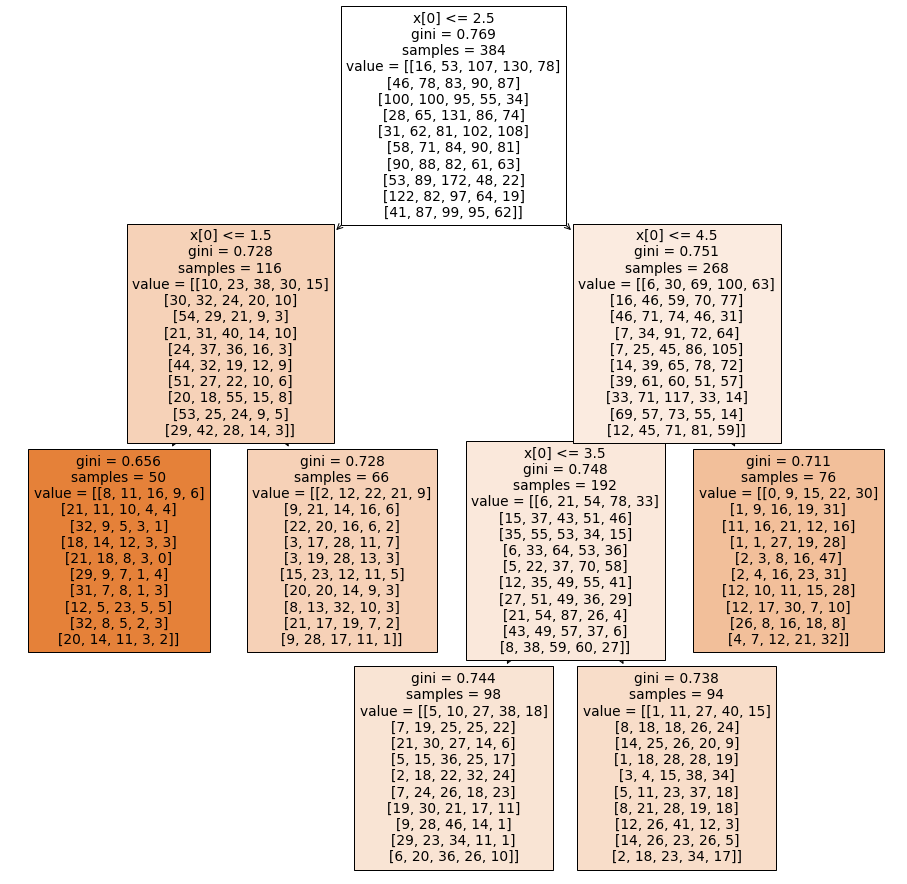

In [89]:
from sklearn import tree

plt.figure(figsize=(16,16))
tree.plot_tree(tree_clf, filled=True)

[Text(0.5, 0.875, 'x[0] <= 2.5\nsquared_error = 1.54\nsamples = 384\nvalue = [[3.523]\n[3.245]\n[2.539]\n[3.294]\n[3.505]\n[3.169]\n[2.789]\n[2.732]\n[2.417]\n[3.13]]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\nsquared_error = 1.325\nsamples = 116\nvalue = [[3.147]\n[2.552]\n[1.948]\n[2.664]\n[2.457]\n[2.224]\n[2.078]\n[2.767]\n[2.034]\n[2.31]]'),
 Text(0.125, 0.375, 'squared_error = 1.321\nsamples = 50\nvalue = [[2.88]\n[2.18]\n[1.64]\n[2.18]\n[1.86]\n[1.84]\n[1.76]\n[2.72]\n[1.72]\n[2.06]]'),
 Text(0.375, 0.375, 'squared_error = 1.155\nsamples = 66\nvalue = [[3.348]\n[2.833]\n[2.182]\n[3.03]\n[2.909]\n[2.515]\n[2.318]\n[2.803]\n[2.273]\n[2.5]]'),
 Text(0.75, 0.625, 'x[0] <= 4.5\nsquared_error = 1.342\nsamples = 268\nvalue = [[3.687]\n[3.545]\n[2.795]\n[3.567]\n[3.959]\n[3.578]\n[3.097]\n[2.716]\n[2.582]\n[3.485]]'),
 Text(0.625, 0.375, 'x[0] <= 3.5\nsquared_error = 1.254\nsamples = 192\nvalue = [[3.578]\n[3.396]\n[2.682]\n[3.417]\n[3.802]\n[3.406]\n[2.943]\n[2.677]\n[2.552]\n[3.312]]'),
 Tex

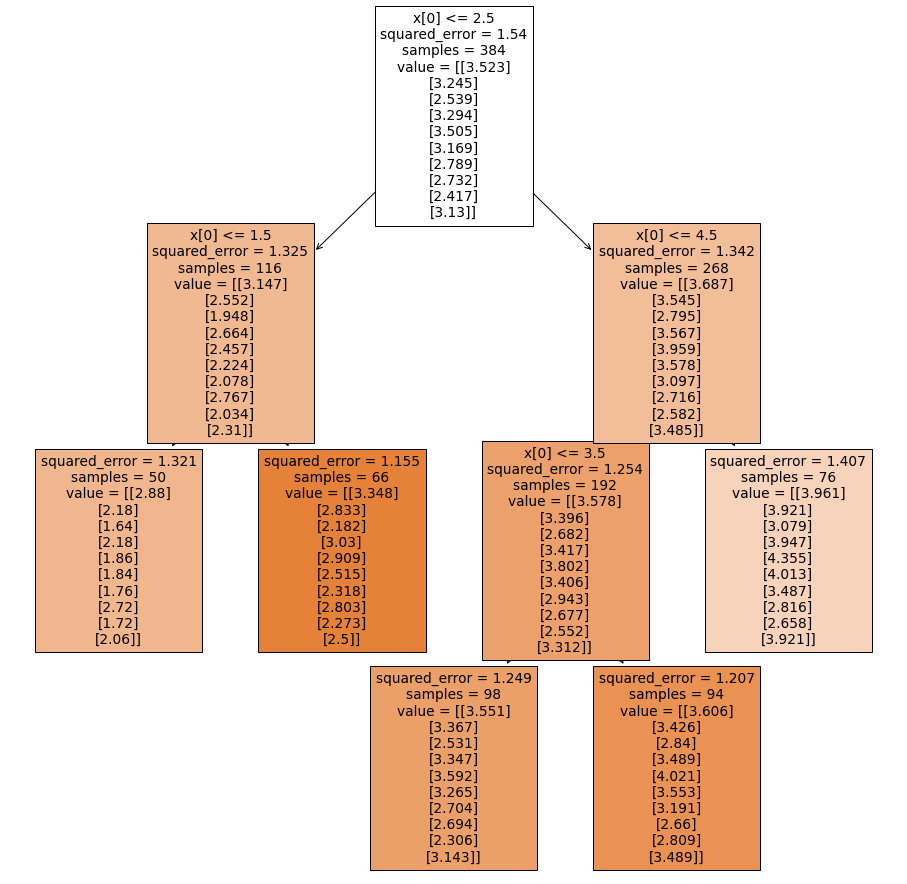

In [90]:
plt.figure(figsize=(16,16))
tree.plot_tree(tree_reg, filled=True)

# Conclusion

The main issue with this is the lack of training data. Although it is high quality, the decision tree could better fit the data with more instances.